### Advanced ML prediction trades on internet compagny shares
- data importation
- data processing
- simple regressor model
- advanced optimization

In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Data importation

In [2]:
start_date = '2012-08-18'
end_date = '2019-12-31'

google_data = data.get_data_yahoo('GOOGL', start_date, end_date)
facebook_data = data.get_data_yahoo('FB', start_date, end_date)
alibaba_data = data.get_data_yahoo('BABA', start_date, end_date)
baidu_data = data.get_data_yahoo('BIDU', start_date, end_date)
sap_data = data.get_data_yahoo('SAP', start_date, end_date)
saleforce_data = data.get_data_yahoo('CRM', start_date, end_date)
vmware_data = data.get_data_yahoo('VMW', start_date, end_date)
adobe_data = data.get_data_yahoo('ADBE', start_date, end_date)
intuit_data = data.get_data_yahoo('INTU', start_date, end_date)
twitter_data = data.get_data_yahoo('TWTR', start_date, end_date)
paypal_data = data.get_data_yahoo('PYPL', start_date, end_date)



### Simple data processing 

In [3]:
data_df = pd.DataFrame({"google_returns": google_data["Close"].shift(1) - google_data["Close"], "facebook_returns": facebook_data["Close"].shift(1) - facebook_data["Close"], "alibaba_returns": alibaba_data["Close"].shift(1) - alibaba_data["Close"], "baidu_returns": baidu_data["Close"].shift(1) - baidu_data["Close"], "sap_returns": sap_data["Close"].shift(1) - sap_data["Close"], "saleforce_returns": saleforce_data["Close"].shift(1) - saleforce_data["Close"], "vmware_returns": vmware_data["Close"].shift(1) - vmware_data["Close"], "adobe_returns": adobe_data["Close"].shift(1) - adobe_data["Close"], "intuit_returns": intuit_data["Close"].shift(1) - intuit_data["Close"], "twitter_returns": twitter_data["Close"].shift(1) - twitter_data["Close"], "paypal_returns": paypal_data["Close"].shift(1) - paypal_data["Close"]})
data_df.dropna(axis=0, inplace=True)
data_df.head()

,google_returns,facebook_returns,alibaba_returns,baidu_returns,sap_returns,saleforce_returns,vmware_returns,adobe_returns,intuit_returns,twitter_returns,paypal_returns
Date,,,,,,,,,,,
2015-07-07,-4.410034,0.330002,0.610001,1.490005,-0.579994,-1.099998,0.079994,-0.089996,-1.660004,-0.090000,0.090000
2015-07-08,8.330017,1.570000,1.680000,2.959991,0.359993,0.870003,1.080002,0.599998,0.150002,0.760002,1.919998
2015-07-09,-2.950012,-0.229996,-1.099998,-2.990005,-1.329994,-0.570000,0.290001,-0.480003,-0.150002,0.399998,0.200001
2015-07-10,-11.459961,-2.070000,-1.260002,-0.179993,-2.459999,-1.180000,-0.459999,-0.119995,-0.779999,-0.549999,-0.189999
2015-07-13,-15.619995,-2.150002,-1.559998,-5.520004,-0.330002,0.089996,-1.730003,-0.850006,-1.070000,-0.869999,-2.090000


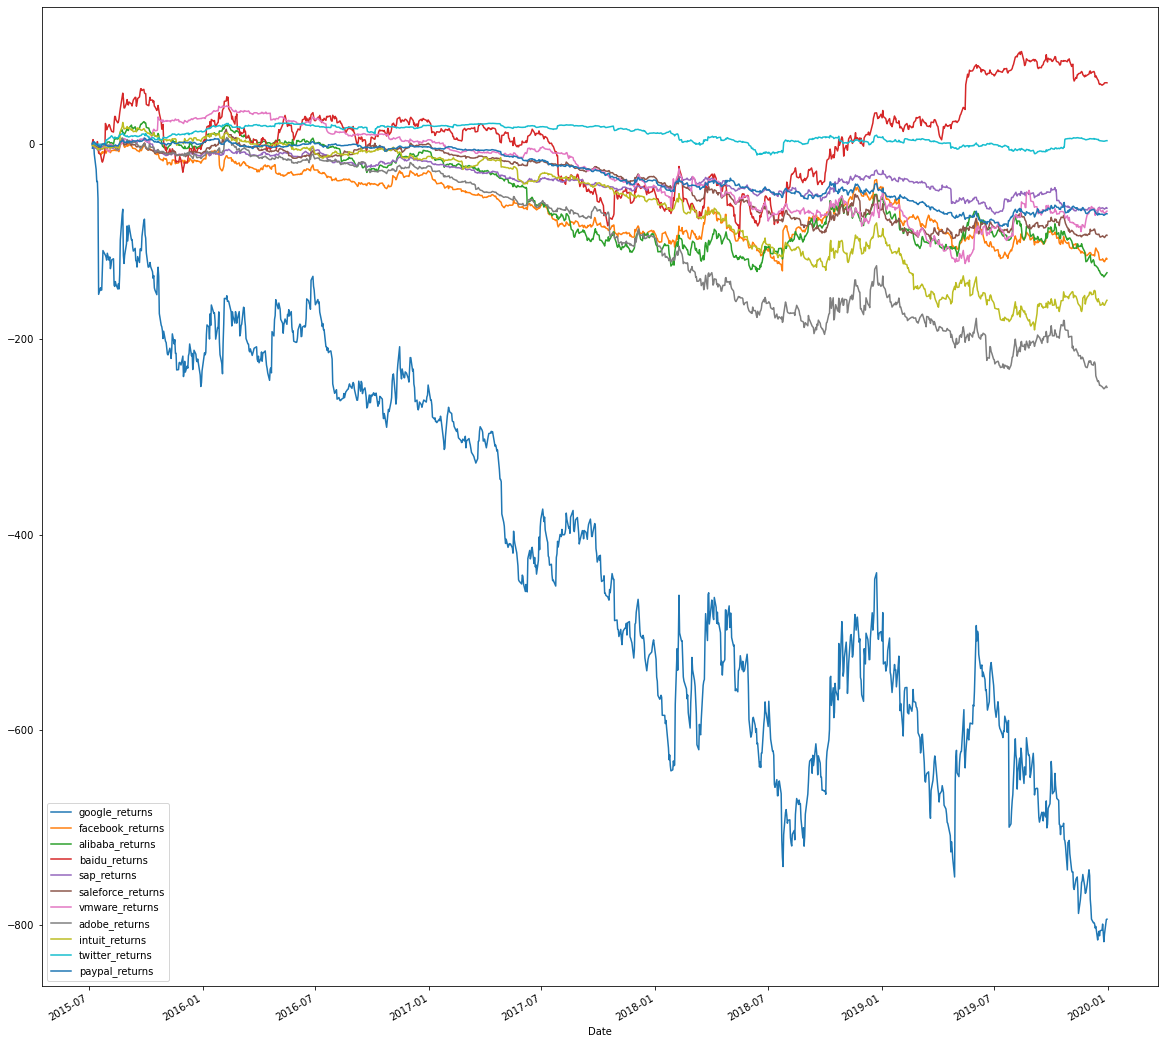

In [4]:
# plotting datas with matplotlib
data_df.cumsum().plot(figsize=(20, 20))

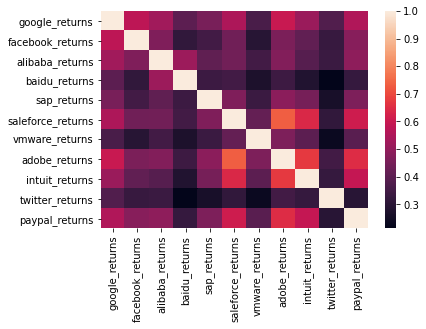

In [5]:
# correlation visualisation with seaborn heatmap
import seaborn as sns
sns.heatmap(data_df.corr())

In [6]:
# set features as X and target as y with default features for this time
X = data_df.drop(["facebook_returns"], axis=1)
y = data_df["facebook_returns"]


In [7]:
# for split the datetime dataset, I use 2016 datas as train set and 2017 data as test set
X_train, X_test, y_train, y_test = X["2016"], X["2017"], y["2016"], y["2017"]

### Simple regressor model

In [8]:
# simple ElasticNet model with default values
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.4141771527904766, 0.5008175481564351)

In [9]:
# create a Pandas DataFrame with target test set as y_test and model prediction of test features set
comparison = pd.DataFrame({"y_test": y_test, "prediction": model.predict(X_test)})

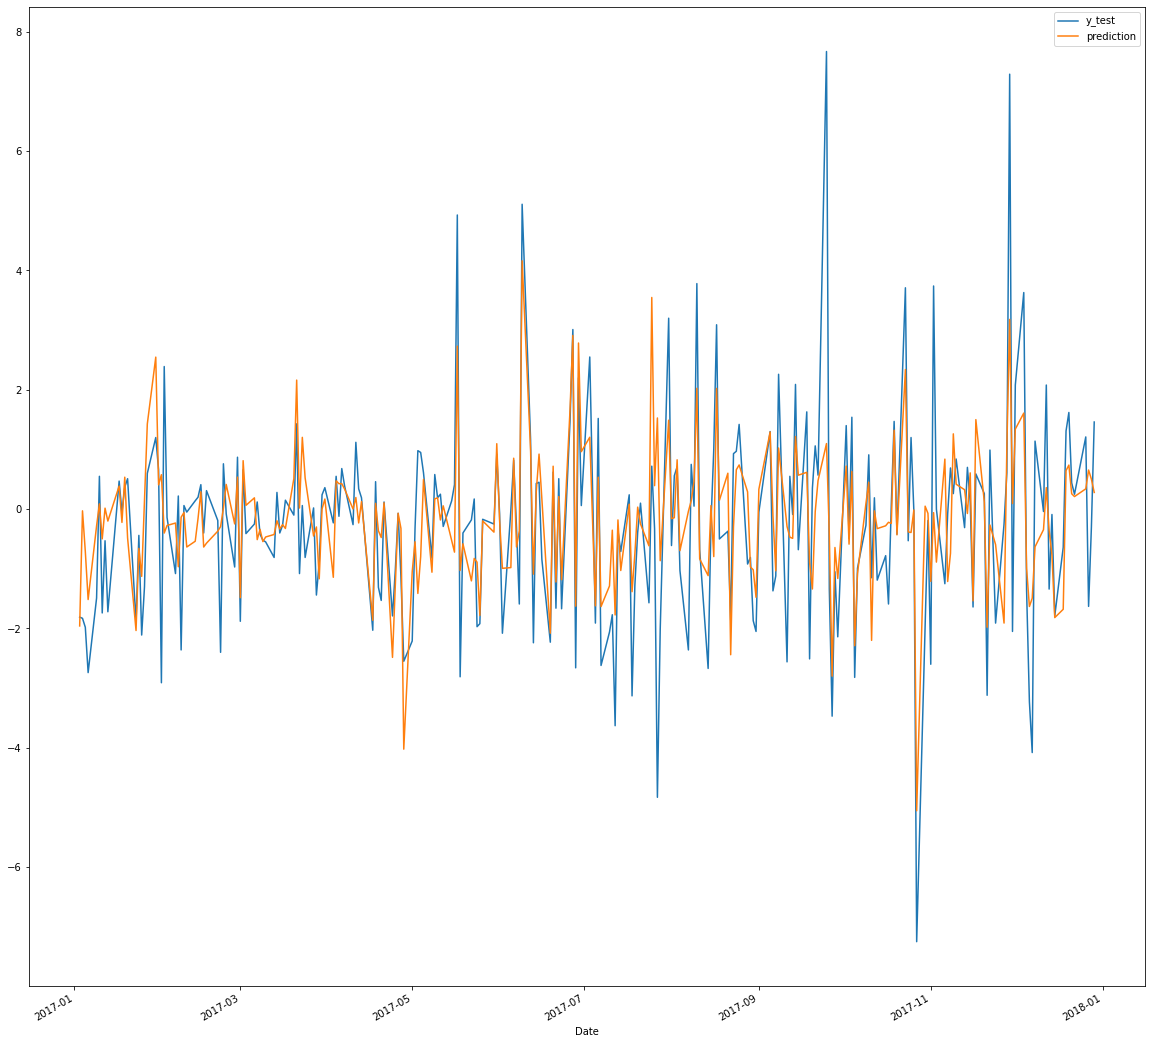

In [10]:
comparison.plot(figsize=(20, 20))

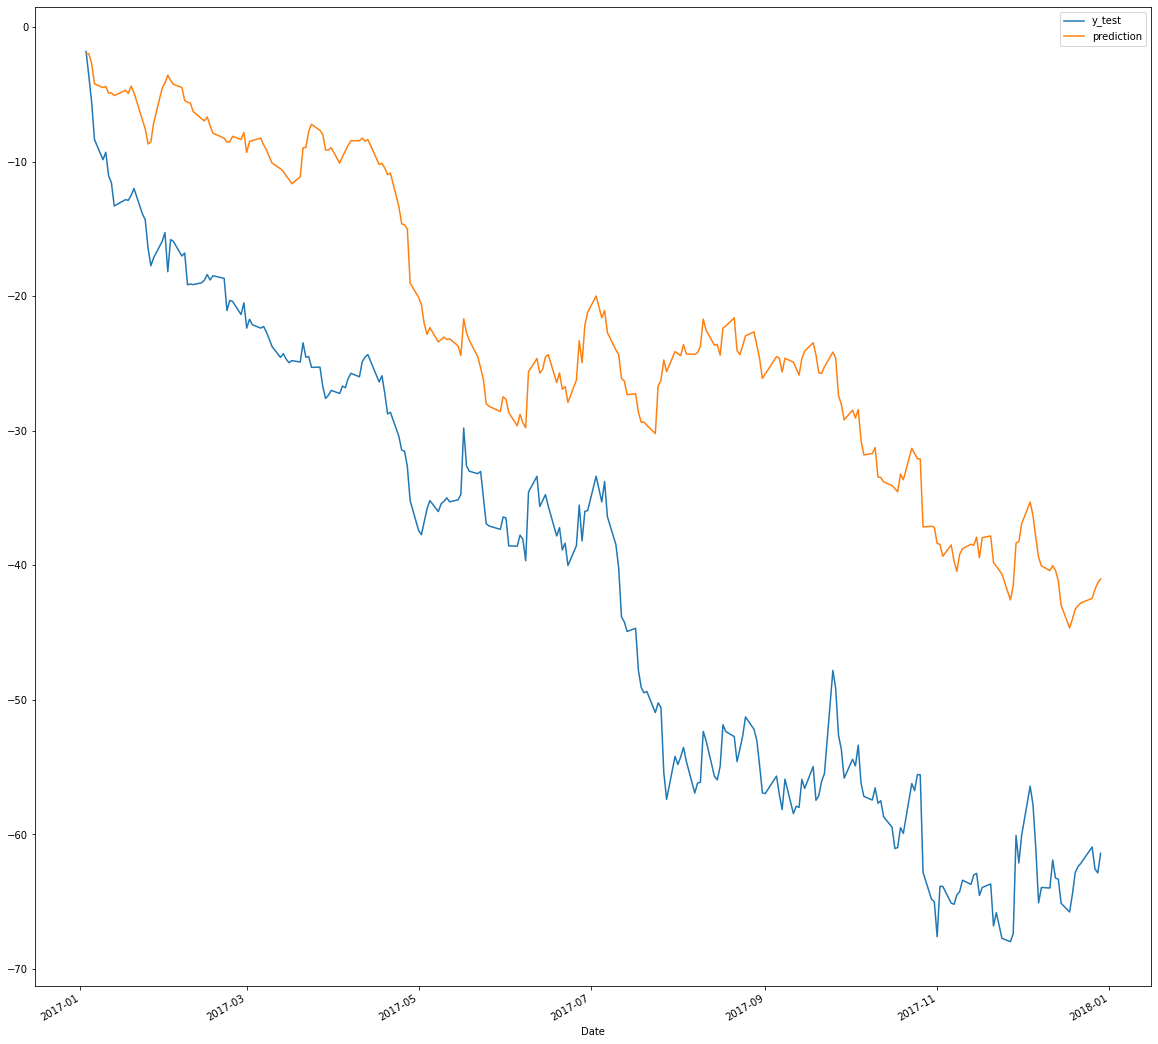

In [11]:
# Cumulate model prediction result in front of keep Facebook shares
comparison.cumsum().plot(figsize=(20, 20))

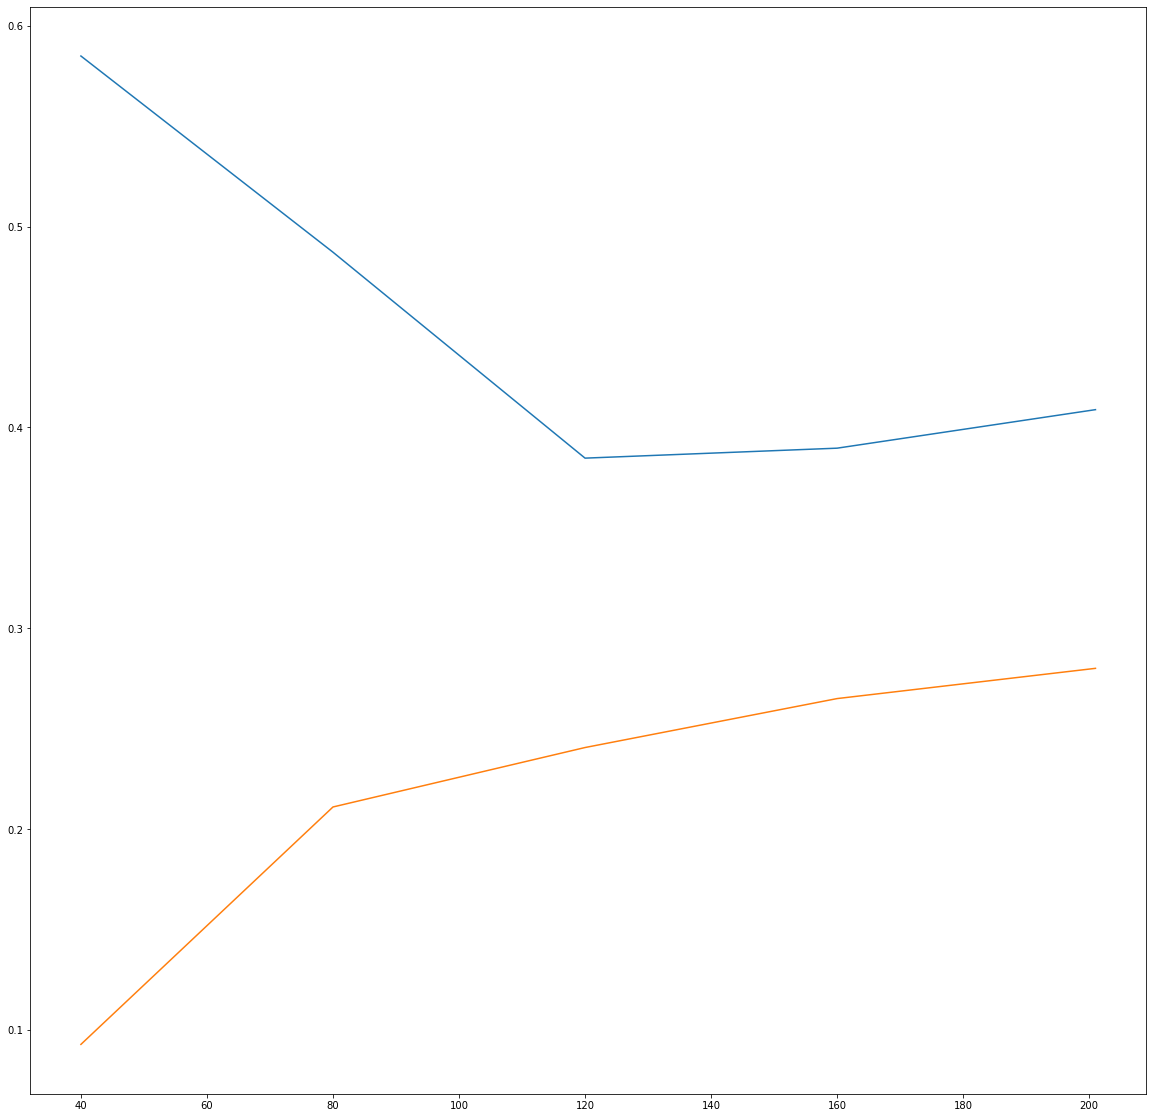

In [12]:
# Verify if the model is overfitted or underfitted with learning curve
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2, 1.0, 5), cv=5)

plt.figure(figsize=(20, 20))
plt.plot(N, train_score.mean(axis=1))
plt.plot(N, val_score.mean(axis=1))


### Advanced model optimization

In [13]:
# I use GridSearchCV to cross validates differents parameters
from sklearn.model_selection import GridSearchCV

param_grid = {"alpha": np.arange(0.1, 0.9, 0.1),
              "l1_ratio": np.arange(0.1, 1., 0.1),
              "tol": np.arange(0.00005, 0.0005, 0.00005)
              }

grid = GridSearchCV(ElasticNet(), param_grid, cv=5)

In [14]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': array([5.0e-05, 1.0e-04, 1.5e-04, 2.0e-04, 2.5e-04, 3.0e-04, 3.5e-04,
       4.0e-04, 4.5e-04])})

In [15]:
# Best parameters got by GridSearchCV
grid.best_params_

{'alpha': 0.2, 'l1_ratio': 0.6, 'tol': 5e-05}

In [16]:
grid_best_params = ElasticNet(alpha=0.2, l1_ratio=0.6, tol=5e-05)

In [17]:
grid_best_params.fit(X_train, y_train)

ElasticNet(alpha=0.2, l1_ratio=0.6, tol=5e-05)

In [18]:
#grid score
grid_best_params.score(X_train, y_train), grid.score(X_test, y_test)

(0.47601186932648976, 0.5648386589985221)

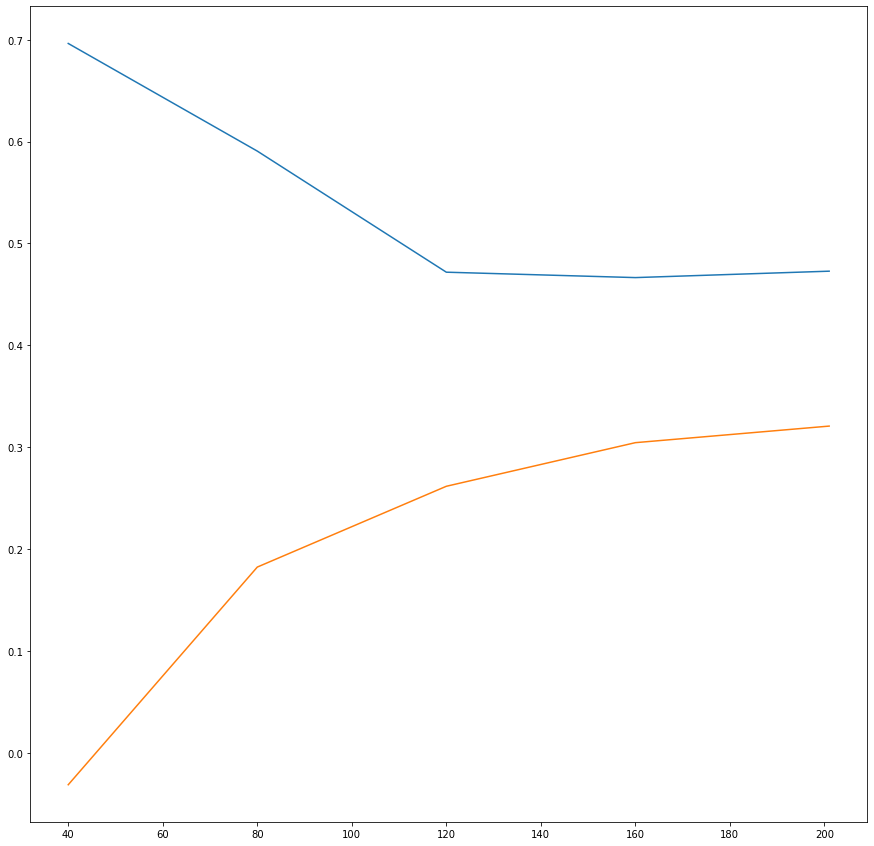

In [19]:
# Again I use learning curve to verify overfit or underfit

N, train_score, val_score = learning_curve(grid_best_params, X_train, y_train, train_sizes=np.linspace(0.2, 1.0, 5), cv=5)

plt.figure(figsize=(15, 15))
plt.plot(N, train_score.mean(axis=1))
plt.plot(N, val_score.mean(axis=1))

In [20]:
# create a Pandas DataFrame with target test set as y_test and model prediction of test features set
grid_comparison = pd.DataFrame({"y_test": y_test, "prediction": grid.predict(X_test)})

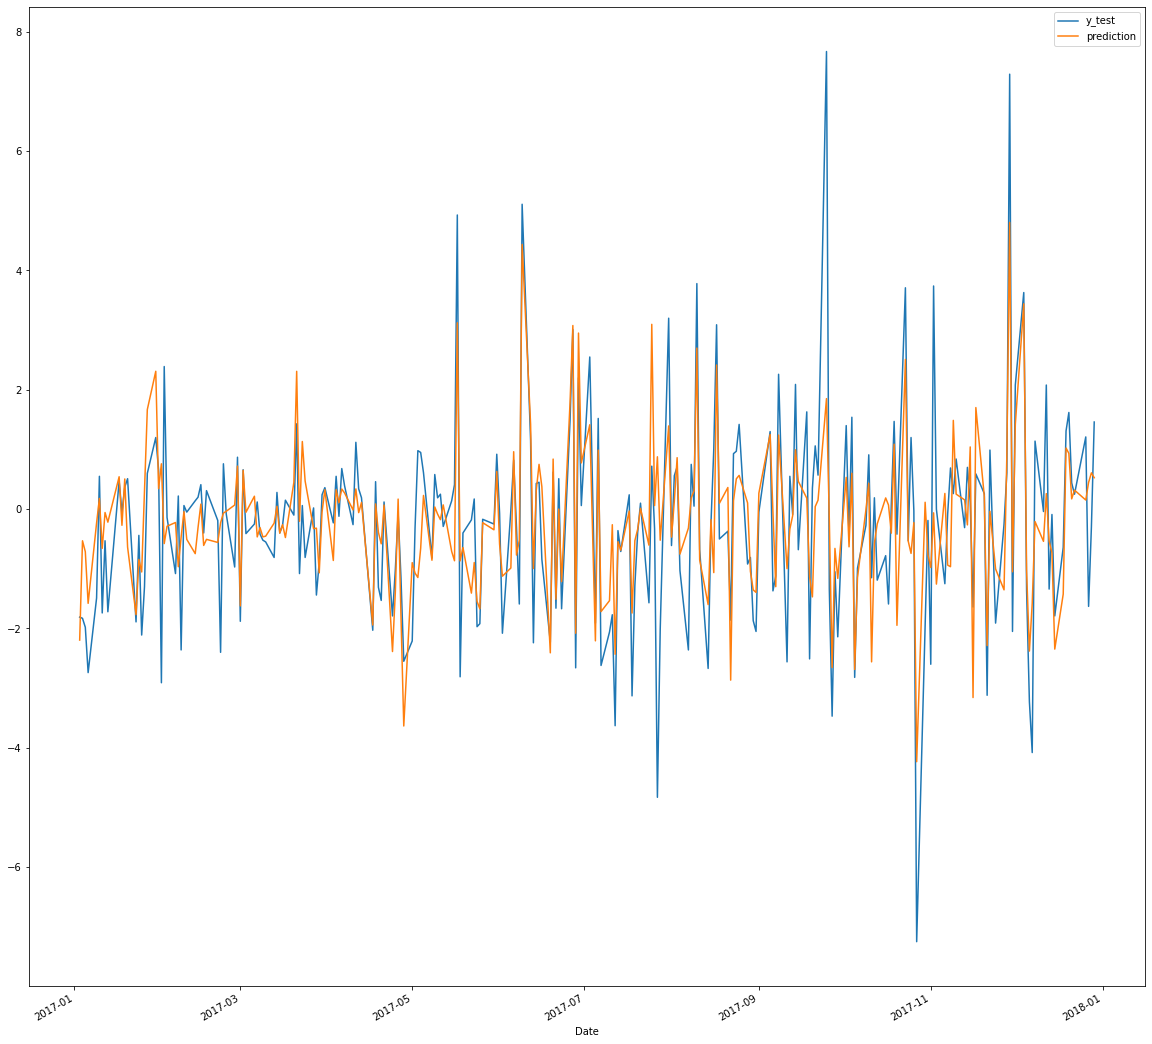

In [21]:
# to plot advanced model prediction result in front of keep Facebook shares
grid_comparison.plot(figsize=(20, 20))

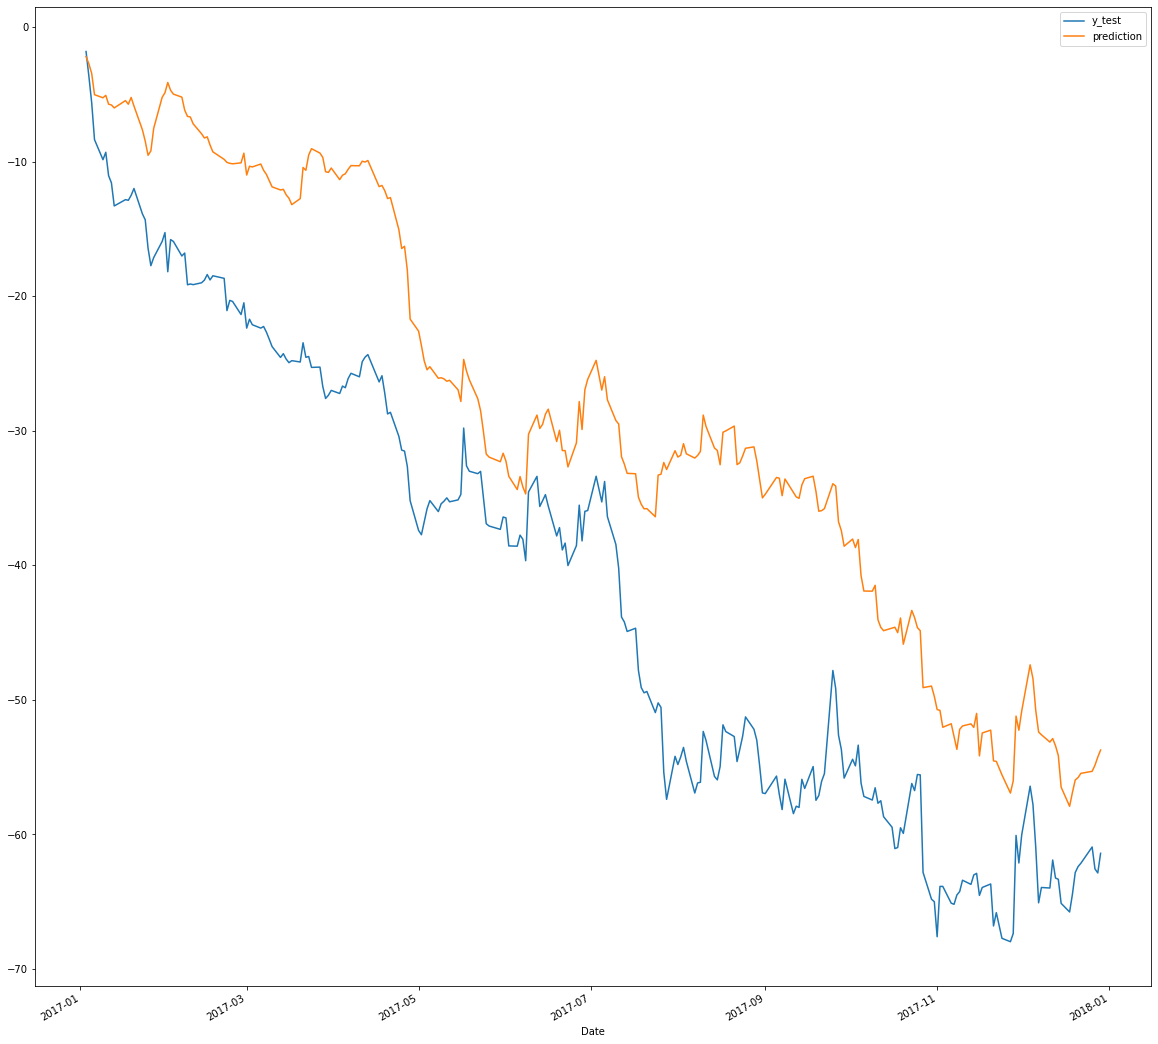

In [22]:
# Cumulate advanced model prediction result in front of keep Facebook shares
grid_comparison.cumsum().plot(figsize=(20, 20))